In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df_train = pd.read_csv('../data/train.csv')
    df_test = pd.read_csv('../data/test.csv')
    df_meal = pd.read_csv('../data/meal_info.csv')
    df_center = pd.read_csv('../data/fulfilment_center_info.csv')
    df_submission = pd.read_csv('../data/sample_submission.csv')
    print("All data files loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: One or more CSV files not found. Check file names. ({e})")
    exit()

# Store test ID for the final submission mapping
test_id = df_test['id']

All data files loaded successfully.


In [3]:
print("\nStarting data merging...")
# Merge meal information
df_train_merged = pd.merge(df_train, df_meal, on='meal_id', how='left')
df_test_merged = pd.merge(df_test, df_meal, on='meal_id', how='left')

# Merge fulfillment center information
df_train_merged = pd.merge(df_train_merged, df_center, on='center_id', how='left')
df_test_merged = pd.merge(df_test_merged, df_center, on='center_id', how='left')

print(f"Merged Training Data Shape: {df_train_merged.shape}")
print(f"Merged Testing Data Shape: {df_test_merged.shape}")



Starting data merging...
Merged Training Data Shape: (456548, 15)
Merged Testing Data Shape: (32573, 14)


In [4]:
df_train_merged['log_num_orders'] = np.log1p(df_train_merged['num_orders'])

print("\nMissing values check in merged train data:")
print(df_train_merged.isnull().sum()[df_train_merged.isnull().sum() > 0])


Missing values check in merged train data:
Series([], dtype: int64)


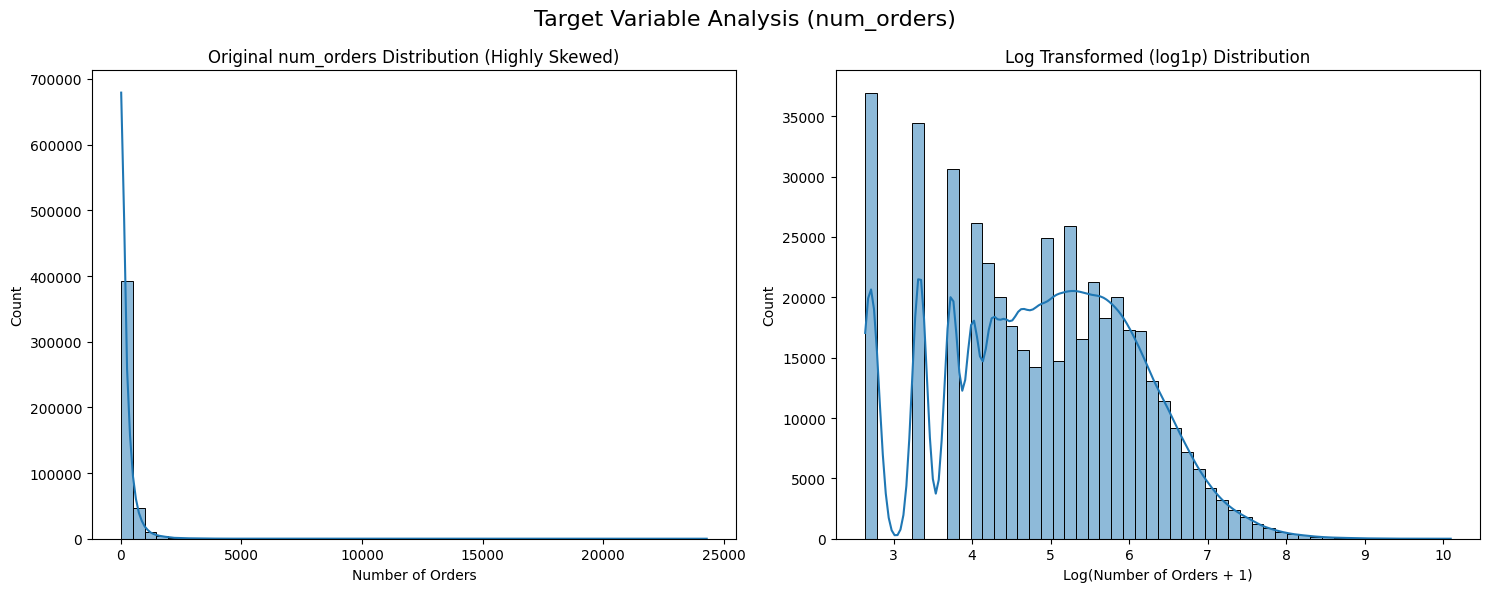

In [5]:
plt.figure(figsize=(15, 6))
plt.suptitle("Target Variable Analysis (num_orders)", fontsize=16)

plt.subplot(1, 2, 1)
sns.histplot(df_train_merged['num_orders'], bins=50, kde=True)
plt.title('Original num_orders Distribution (Highly Skewed)')
plt.xlabel('Number of Orders')

plt.subplot(1, 2, 2)
sns.histplot(df_train_merged['log_num_orders'], bins=50, kde=True)
plt.title('Log Transformed (log1p) Distribution')
plt.xlabel('Log(Number of Orders + 1)')
plt.tight_layout()
plt.show()

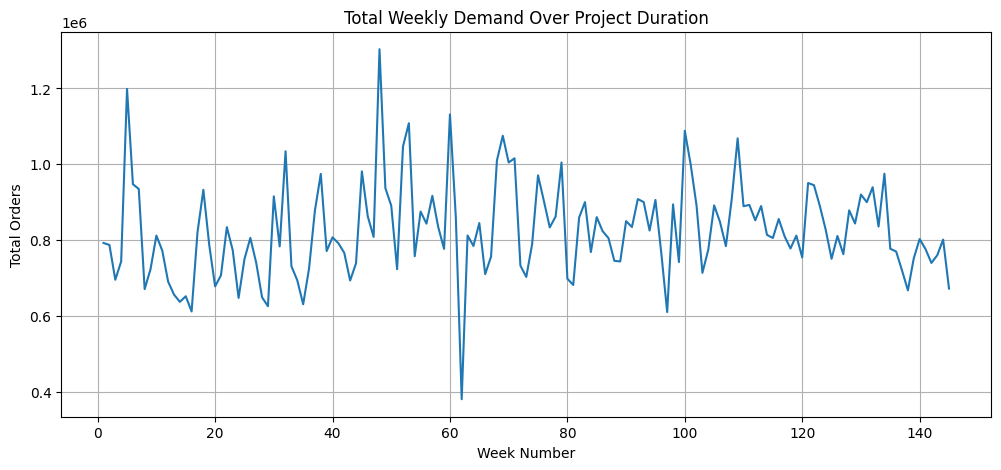

In [6]:
df_train_merged.groupby('week')['num_orders'].sum().plot(figsize=(12, 5))
plt.title('Total Weekly Demand Over Project Duration')
plt.xlabel('Week Number')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

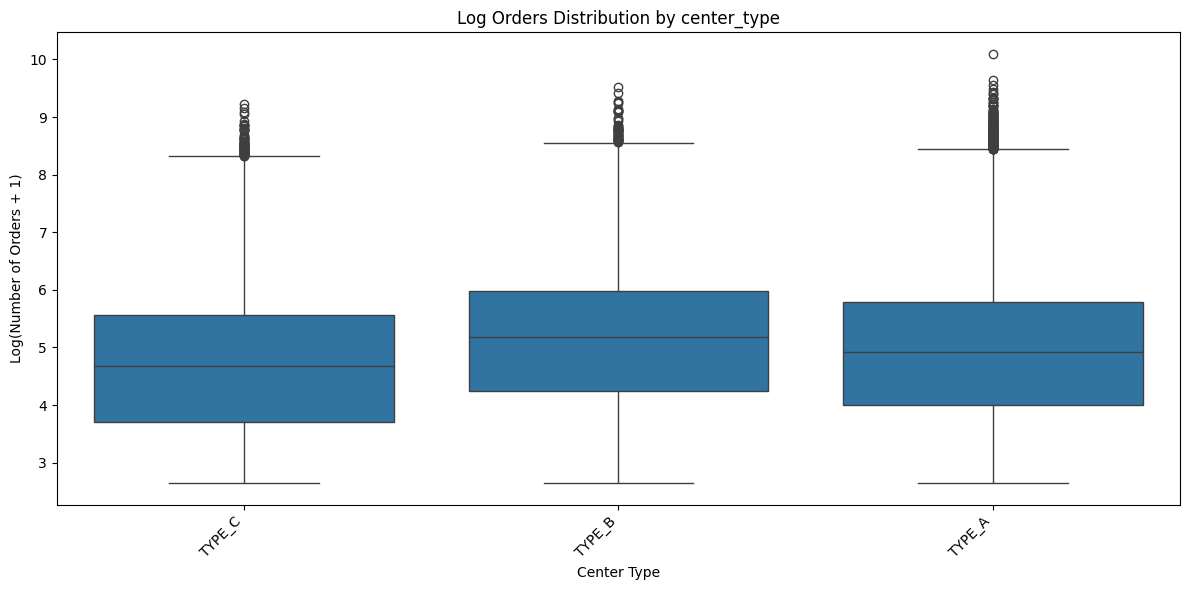

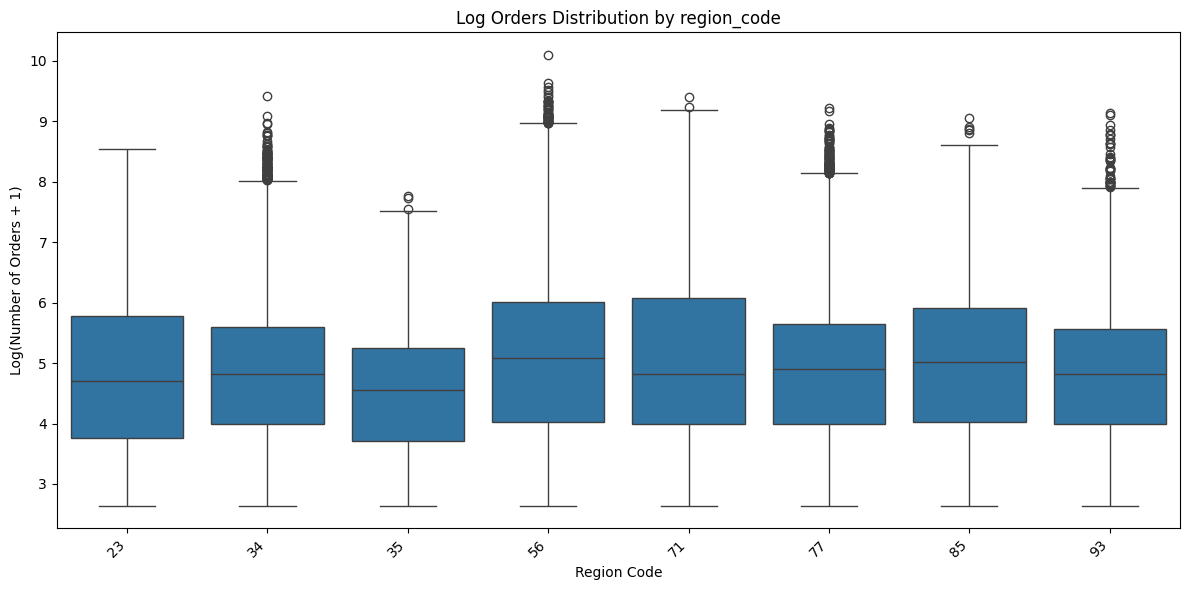

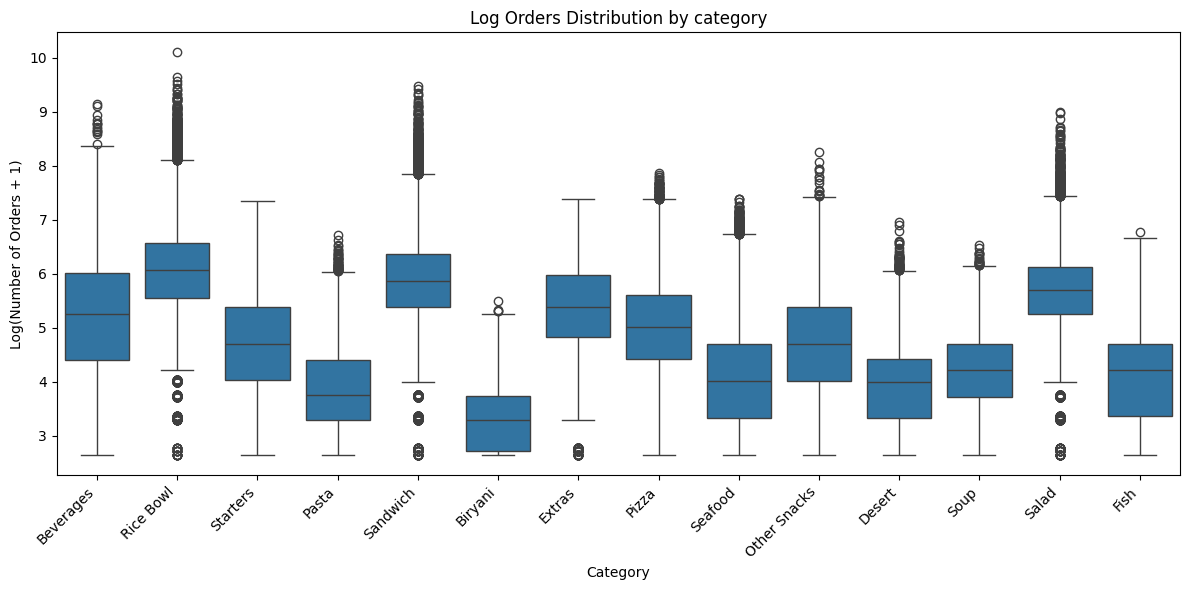

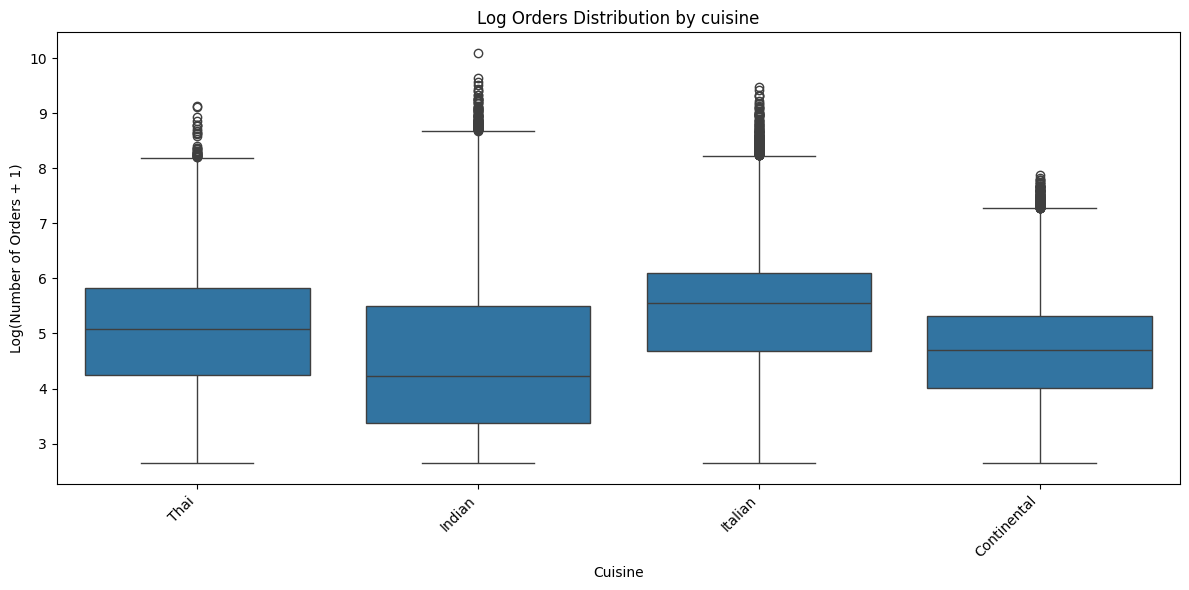

In [7]:
categorical_features = ['center_type', 'region_code', 'category', 'cuisine']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='log_num_orders', data=df_train_merged)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Log Orders Distribution by {feature}')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Log(Number of Orders + 1)')
    plt.tight_layout()
    plt.show()

In [ ]:
df_train_merged.to_csv('processed_train.csv', index=False)
df_test_merged.to_csv('processed_test.csv', index=False)
print("\nProcessed and merged data saved to 'processed_train.csv' and 'processed_test.csv'.")


Processed and merged data saved to 'processed_train.csv' and 'processed_test.csv'.
Proceed to '02_feature_engineering.py'.
